# Getting started
Before diving into the material we should make sure that all the technical things are working as we expect them to. We want that `python` is installed correctly and that we have `qiskit`, `numpy` and `matplotlib` installed also.

To be able to run the code we first want to make sure that we have a python installation with all the necessary requirements for the code in this course.

When working with python, we recommend you to use a python distribution such as `miniconda` to handle installation of different packages. With `miniconda` you can create separate python "environments", which all can have a different version of python and different lists of installed packages, which each can be of separate versions. This avoids the common issue of conflicting package versions if you are working on multiple different projects with python.

To install `miniconda`, download the correct installer from [https://docs.conda.io/projects/miniconda/en/latest/]() and follow the instructions at the bottom of the page. On Linux and MacOS you can also simply just execute the file in the terminal:

```> sh Miniconda3-latest-Linux-x86_64.sh```

and follow the instructions from the installer.

Once `miniconda` has been installed, you can restart the terminal and `(base)` should appear at the left side of your terminal. This indicated that the currently active `miniconda` environment is `base`.

To install all the requirements that you will need in this course, we have prepared a `requirements.yml` file that you can use to create an environment. To create a new `miniconda` environment with all the requirements, you run:

```> conda env create -f requirements.yaml```

This should create a new environment with the name `oqs-hy2023`. To activate it, run:

```> conda activate oqs-hy2023```

You will need to do this every time you restart the terminal and want to change to this environment. If you now see `(oqs-hy2023)` on the left side of the terminal you can move on!

Feel free to use any text editor that you are comfortable with (I use [Visual Studio Code](https://code.visualstudio.com/)) but please return your exercise solutions in either Jupyter notebook format or as a python (`.py`) file. Please also annotate your code where you believe it to be necessary and in case you return a python file, please also describe how to run the script and where to expect your results as comments in the code or a separate text or pdf file. 

Let us first take a look at `numpy` ([API Reference](https://numpy.org/doc/1.23/reference/index.html)). It is a very useful python library that can be used for all kinds of numerical computations dealing specifically with matrices and arrays.

Python natively supports `lists` which are dynamically sized, meaning that you can add or remove elements to lists after you have created them. `numpy` arrays, on the other hand, have a fixed size, which means that you must create a new array if you want to modify the size of one. This is one reason `numpy` operations are typically faster, as the underlying implementation is based on the C language.

Let us quickly compare them.

In [1]:
python_list = [0,0,0,0]

When you add python lists, you concatenate them.

In [2]:
python_list + python_list

[0, 0, 0, 0, 0, 0, 0, 0]

Subtraction between python lists is not supported.

In [3]:
python_list - python_list

TypeError: unsupported operand type(s) for -: 'list' and 'list'

You can append elements to a python list.

In [4]:
python_list.append(1)
python_list

[0, 0, 0, 0, 1]

Lists may also contain different types of objects, such as dictionaries, instances of any python class or even other lists.

You may also find these following python tools and objects useful.

In [5]:
# List comprehension
print([i for i in range(2,10)])

# Dictionary
result = {"a": 10, "b": 5, "c": 2}
print(result["a"])
result.update({"a": 0, "d": 5})
print(result)

# Enumerate (index and value)
for i, value in enumerate([10,11,12,13]):
    print(f"Index {i}, value {value}")

[2, 3, 4, 5, 6, 7, 8, 9]
10
{'a': 0, 'b': 5, 'c': 2, 'd': 5}
Index 0, value 10
Index 1, value 11
Index 2, value 12
Index 3, value 13


In [6]:
import numpy as np

numpy_array = np.array([1,0,0,1])

Addition with `numpy` instead performs an elementwise addition. Likewise for subtraction, multiplication and division.

In [7]:
numpy_array + numpy_array

array([2, 0, 0, 2])

Multiplying two arrays in this way, performs element-wise multiplication.

In [8]:
np.array([1, 2]) * np.array([5, 10])

array([ 5, 20])

Multidimensional lists and arrays can be created using lists of lists.

In [9]:
numpy_array = np.array([[1,0,0,1], [0,0,0,1], [0,1,0,1], [0,0,0,0]])
numpy_array

array([[1, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 0]])

With multidimensional arrays, you can easily perform linear algebra.

In [11]:
# Matrix product
print(numpy_array @ numpy_array)
print(numpy_array * numpy_array)

# Norm of matrix
print(np.linalg.norm(numpy_array, ord=2))
print(np.trace(numpy_array))

# Conjugate transpose of matrix
complex_array = np.array([[1-1j, 0-1j], [0+0j, 1+1j]])
print(complex_array)
print(complex_array.T.conj())

[[1 0 0 1]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 0 0]]
[[1 0 0 1]
 [0 0 0 1]
 [0 1 0 1]
 [0 0 0 0]]
1.9318516525781366
1
[[1.-1.j 0.-1.j]
 [0.+0.j 1.+1.j]]
[[1.+1.j 0.-0.j]
 [0.+1.j 1.-1.j]]


There are also several useful features that `numpy` provides.

In [13]:
# Identity matrix
I = np.eye(5)
print(I)

# Random 2x2 matrix
rand_matrix = np.random.choice([0,1,2], size=10, p=[0.1, 0.5, 0.4])
print(rand_matrix)

# Repeat 2x2 matrix
tiled_matrix = np.repeat([[0,1],[2,3]], repeats=5, axis=1)
print(tiled_matrix)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[0 2 2 0 1 2 1 2 2 1]
[[0 0 0 0 0 1 1 1 1 1]
 [2 2 2 2 2 3 3 3 3 3]]


`numpy` also provides a random number generator. To pick between `0` and `1` with a uniform distribution you can do the following.

In [14]:
np.random.choice([0,1], size=20)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])

`matplotlib` ([User Guide](https://matplotlib.org/stable/users/index)) is the most popular plotting library in python. You can do many different things with it and it can be quite flexible.

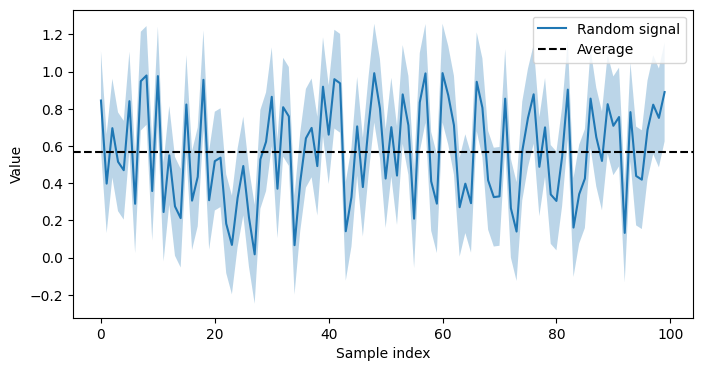

In [15]:
import matplotlib.pyplot as plt

# Generate 100 random values between 0 and 1.
x = range(100)
y = np.random.random(100)

plt.figure(figsize=(8,4))

# Plot the 100 random values
plt.plot(x, y, label="Random signal")

# Error bars to 1 standard deviation
error = np.std(y)
plt.fill_between(x, y - error, y + error, alpha=.3)

# Plot the average of the 100 values
plt.axhline(np.mean(y), linestyle="--", color="black", label="Average")
plt.xlabel("Sample index")
plt.ylabel("Value")
plt.legend()

Now we may start taking a look at `qiskit` ([Documentation](https://docs.quantum-computing.ibm.com/)). The `qiskit` library consists of many tools for quantum computing developed mainly by IBM. The library itself has become very large and contains all kinds of features such as the ability to create a quantum circuit, computing expectation values for quantum mechanical systems, simulating noisy quantum devices and so on. For the purposes of this introduction we will focus mainly on the things necessary for the remainder of the course, which will involve creating quantum circuits, running them on simulators or real devices and analysing their results.

We will not dive too deep into the theory of quantum computing, but let us cover the essentials.

A quantum computer consists of qubits, a two-level quantum system. On IBM devices they are implemented using superconductors, however there are other realisations of qubits. A qubit exhibits the properties of a quantum system, meaning it can be in superposition, entangled to other qubits and so on. In practice it is difficult to isolate a quantum computer from its envionment completely, which means that qubits will interact with the environment in some way. In quantum computing we consider these interacations as noise or errors as the quantum computer starts to behave in a way we wouldn't expect or want.

In the framework of quantum computing, we use a set of operators or gates that can be applied to one or many qubits. Some common ones are the Pauli matrices (X, Y, Z) and the CNOT gate, which performs a Pauli X on a qubit based on the state of another. The CNOT gate entangles two qubits. We will cover more of these later in the course.

Let us first create a quantum circuit where we apply the Pauli X on all qubits. In a quantum circuit we assume that all qubits are initialised in the $|0\rangle$ state. The action of the Pauli X on this state is to flip it to the $|1\rangle$ state.

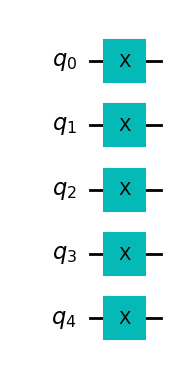

In [16]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(5)
qc.x([q for q in range(qc.num_qubits)])
qc.draw(output='mpl')

We can investigate the statevectors of circuits directly. For clarity, let us do this on a single qubit circuit.

In [17]:
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)
sv = Statevector(qc)
print(sv)

qc.x(0)
sv = Statevector(qc)
print(sv)

qc.h(0)
sv = Statevector(qc)
print(sv)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


Now let us run a circuit on a simulator. There are a few simulators we can pick from, even ones that simulator noise models based on noise that appears on IBM's real quantum devices. One can even make their own noise model. But for now, let us assume that the quantum computer is noiseless and we perform an ideal simulation of the quantum circuit.

In [18]:
from qiskit import Aer

Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

Let us pick `aer_simulator`, which performs a noiseless statevector simulation, however simulates so-called shot noise. Shot noise arises due to the fact that 

In [19]:
backend = Aer.get_backend('aer_simulator')

When creating circuits, one should usually take the hardware layout and qubit connectivity of the device into account. The simulator however, has full connectivity (all qubits can perform a cnot between each other) and the limit for the number of qubits is often determined by your computer. Let us create a simple 5-qubit quantum circuit, with a little bit of entanglement.

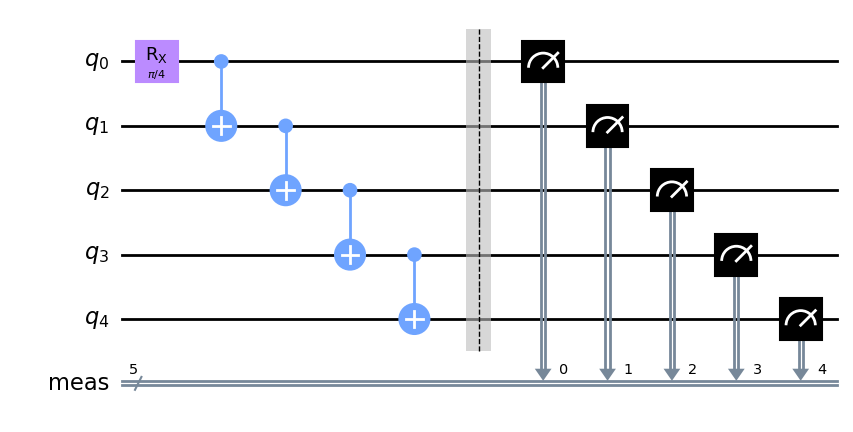

In [20]:
qc = QuantumCircuit(5)

qc.rx(np.pi/4, 0)

for target_qubit in range(1,5):
    qc.cnot(target_qubit - 1, target_qubit)

# Let us store the circuit without the measurement for later use
qc_tmp = qc.copy()
qc.measure_all()
qc.draw(output='mpl')

Now let us simulate the circuit with 1000 shots. That means that we produce the state in the quantum circuit and measure each 1000 times. Each time we measure, we can, in theory, obtain a different outcome based on the quantum state that is prepared. This experiment gives us a histogram of different outcomes, so the more shots we take, the more accurately the histogram will represent the expected probability distribution of the quantum state.

In [21]:
job = backend.run(qc, shots=10000)
result = job.result()
result.get_counts()

{'11111': 1450, '00000': 8550}

We can compute the expected probabilities in the following way.

In [22]:
# Explicitly construct the |00000> statevector
zero = np.array([1,0])
all_zeros_state = zero.copy()
for qubit in range(qc.num_qubits - 1):
    all_zeros_state = np.kron(all_zeros_state, zero)

psi = Statevector(qc_tmp)
psi_zero = Statevector(all_zeros_state)

# Calculate |<00000|psi>|^2
np.abs(psi.inner(psi_zero))**2

0.8535533905932737

In [24]:
all_zeros_state

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# Explicitly construct the |11111> statevector
one = np.array([0,1])
all_ones_state = one.copy()
for qubit in range(qc.num_qubits - 1):
    all_ones_state = np.kron(all_ones_state, one)

psi = Statevector(qc_tmp)
psi_one = Statevector(all_ones_state)

# Calculate |<11111|psi>|^2
np.abs(psi.inner(psi_one))**2

0.14644660940672624

In [25]:
psi

Statevector([0.92387953+0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        -0.38268343j],
            dims=(2, 2,

Let us try the same same experiment on a noisy simulator. These use noise models based on calibration data on IBM's real quantum devices. They are not completely accurate, but often do the job.

In [26]:
from qiskit.providers.fake_provider import FakeHanoi

backend = FakeHanoi()
job = backend.run(qc, shots=1000)
result = job.result()
result.get_counts()

{'11000': 2,
 '11110': 2,
 '11011': 8,
 '00100': 15,
 '00001': 4,
 '11111': 139,
 '11100': 2,
 '10111': 2,
 '01000': 7,
 '00010': 4,
 '10000': 7,
 '11101': 7,
 '00000': 801}

As you can tell, now we obtain many different outcomes, which occured because some noise channels acted on the qubits!

We can also try to run these circuits on real hardware. To do this please go to [https://quantum-computing.ibm.com/]() and create an account. Use the token you obtain from the website below to save your account.

In [29]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(token="TOKEN")

To run the circuits, we follow similar steps to before with some differences. Also notice that one account has access to each quantum computer on IBM Quantum for 10 minutes per month. We will not force you to run experiments on these devices, but encourage you to do so if you wish!

In [30]:
from qiskit_ibm_runtime import Sampler

service = QiskitRuntimeService()
service.backends()

[<IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_brisbane')>]

In [31]:
backend = service.get_backend("ibmq_qasm_simulator")
sampler = Sampler(backend)

job = sampler.run(qc, shots=1000)
job_id = job.job_id()
print(job_id)

cl1nbon78f9fa1m0tdpg


If you want to close the notebook while you wait in queue for the job to run, you can store the ID of your job. It is then easy to retrieve results from your job later on.

In [32]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
job2 = service.job(job_id=job_id)
job2.result()

SamplerResult(quasi_dists=[{31: 0.156, 0: 0.844}], metadata=[{'shots': 1000, 'circuit_metadata': {}}])

The results here are not in the form of counts, but quasi-probability distributions. This is because you can use some of the noise mitigation techniques that Qiskit offers on these results. These noise mitigation techniques may return small negative probabilities and for that it would not make sense to return counts.

In [33]:
job2.result().quasi_dists

[{31: 0.156, 0: 0.844}]